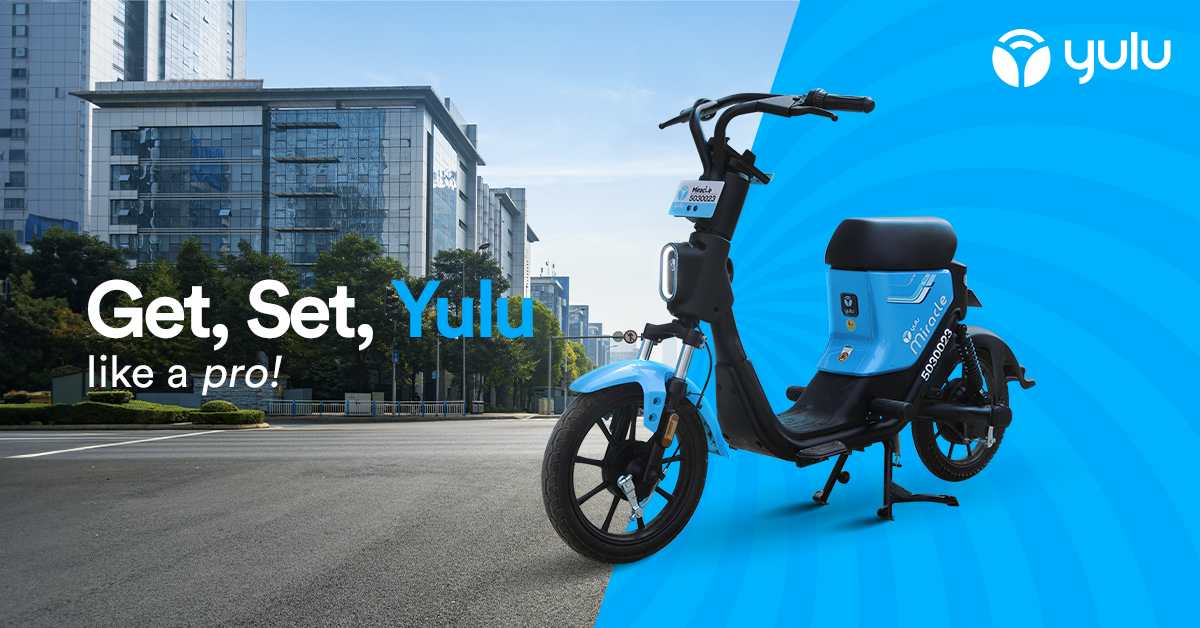

***PROBLEM STATEMENT:***

---



Yulu, India's leading micro-mobility service provider, is facing a decline in revenues and has enlisted a consulting company to analyze the factors influencing the demand for shared electric cycles in the Indian market. The goal is to identify significant variables that predict demand and assess their impact on electric cycle demand. The dataset provided (yulu_data.csv) includes information on datetime, season, holiday status, working day, weather conditions, temperature, feeling temperature, humidity, wind speed, as well as counts of casual users, registered users, and the total rental bike count. Our aim to determine key predictors and understand the overall effectiveness of these variables in describing the demand for shared electric cycles in India.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('ggplot')

In [5]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Shape of the data:

df.shape

NameError: name 'df' is not defined

In [7]:
#Size of the data:

df.size

130632

In [9]:
# Info:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
# Statistical report:

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
# Data types:

df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [14]:
#Null values detection:

df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [15]:
# Duplicate values detection:

df.duplicated().sum()

0

In [17]:
# Converting into data time fucntion:

df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = df['datetime'].dt.month

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


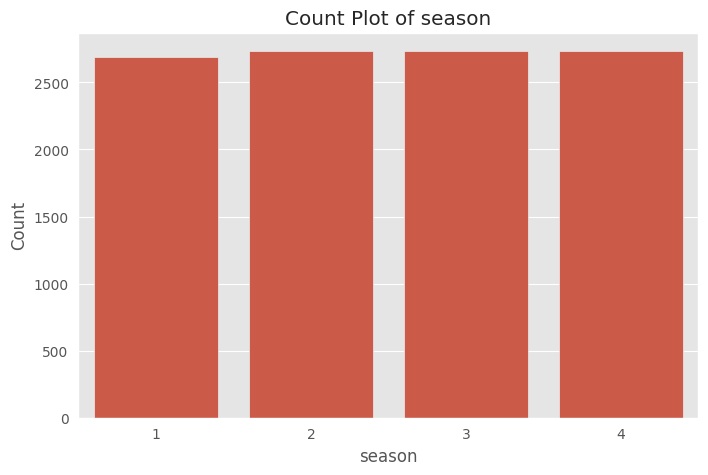

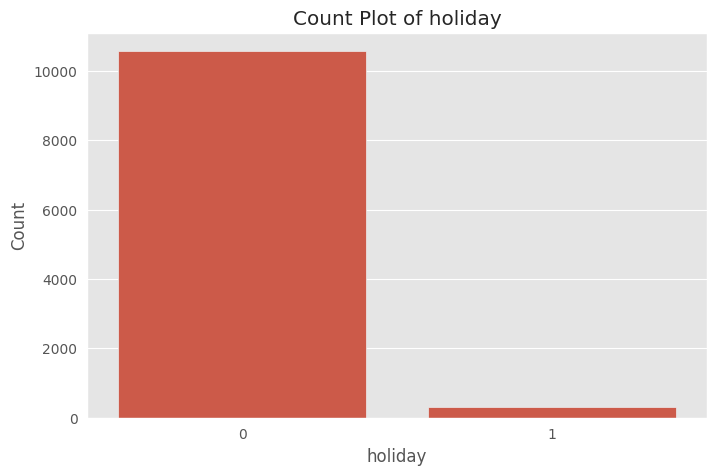

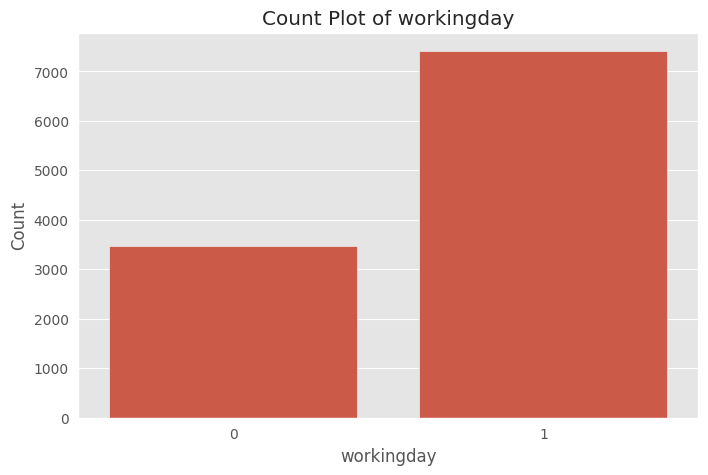

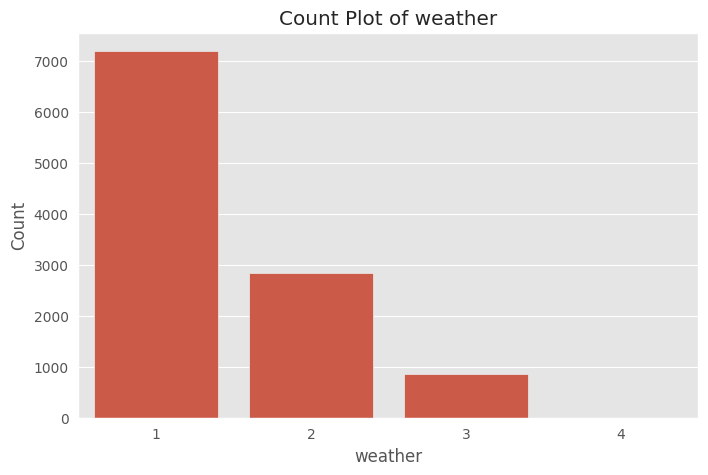

In [ ]:
categorical_vars = ['season', 'holiday', 'workingday', 'weather']

for i in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x= i, data=df)
    plt.title(f'Count Plot of {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

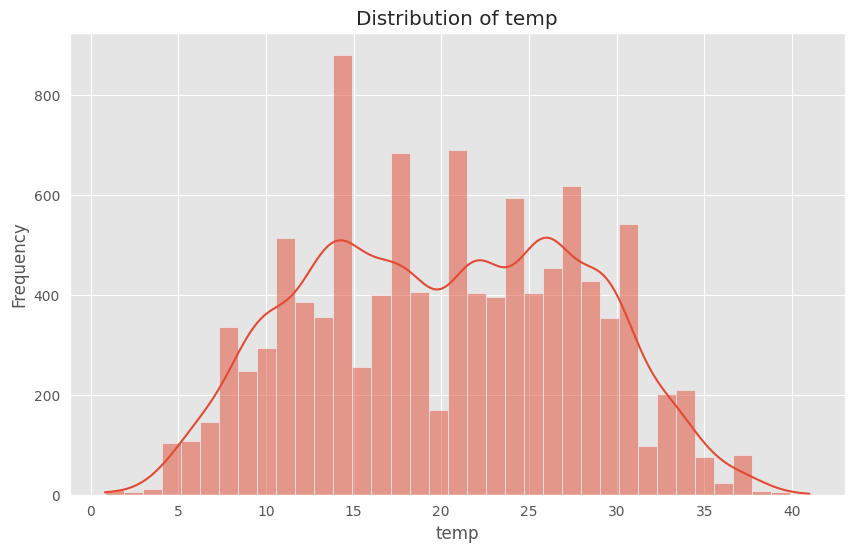

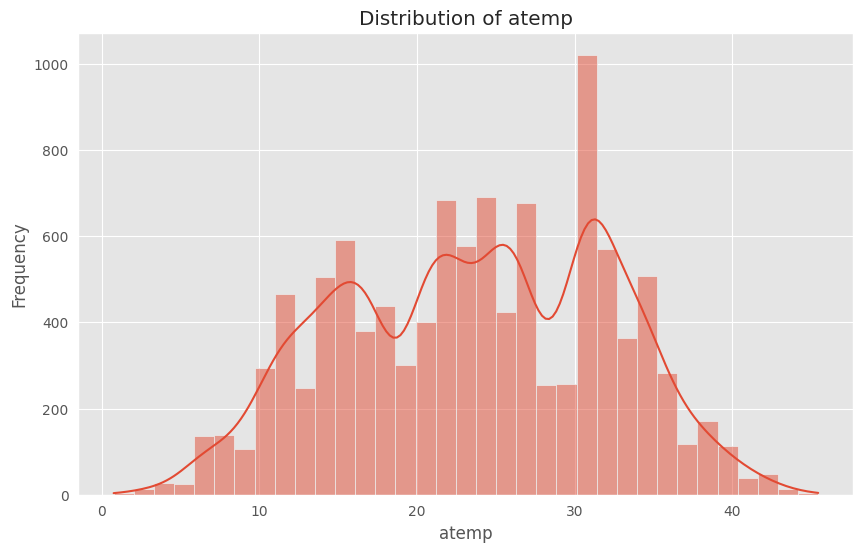

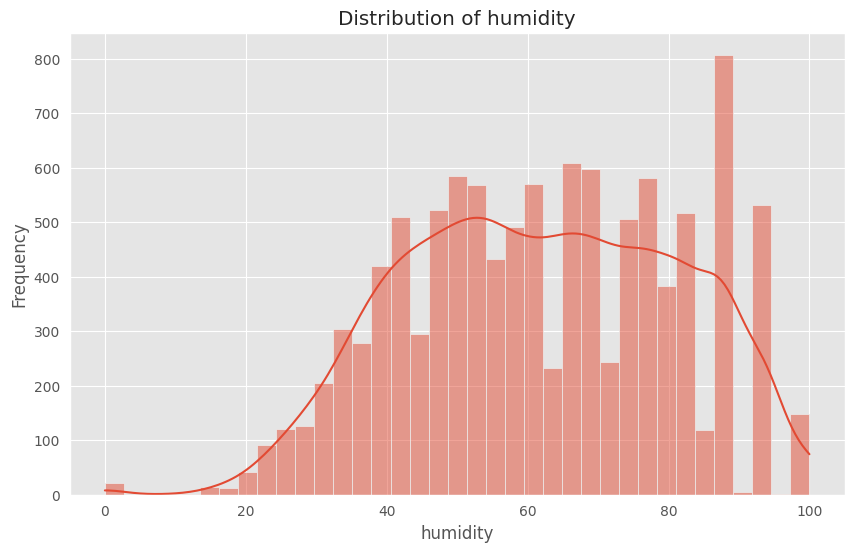

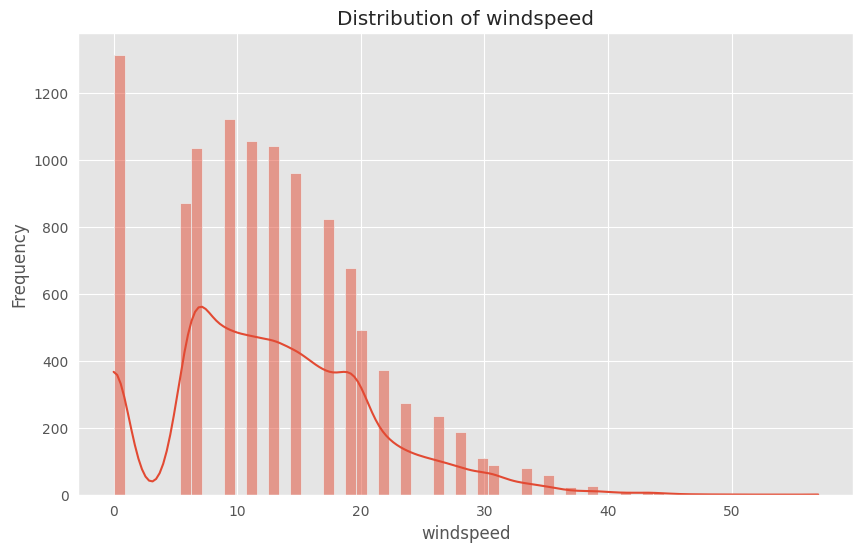

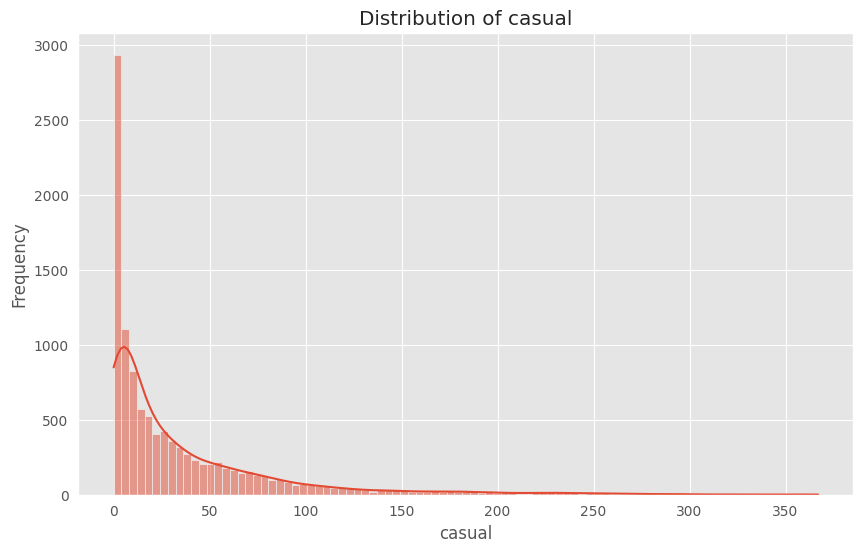

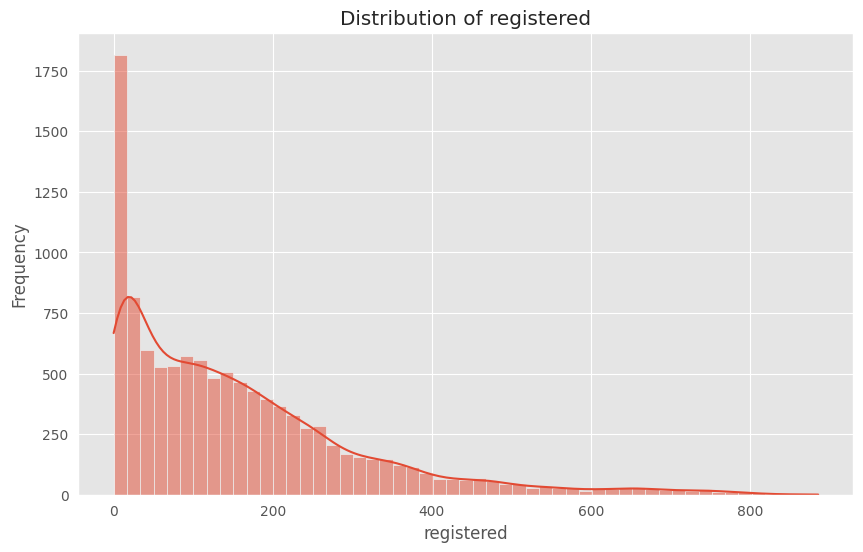

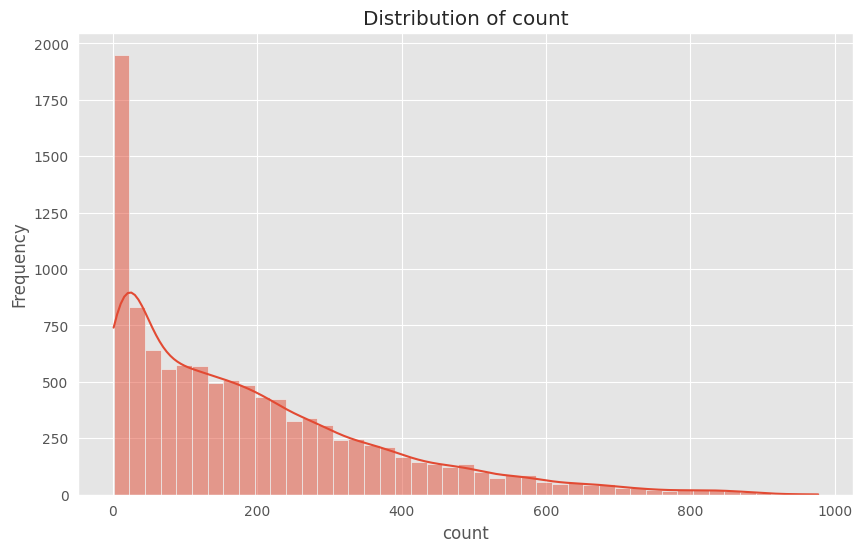

In [ ]:
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


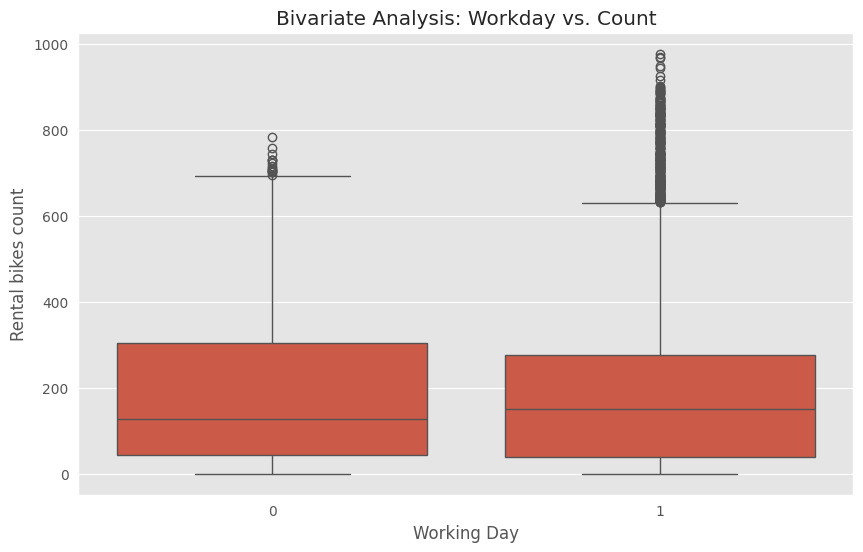

In [ ]:
# Bivariate analysis for workday and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='count', data=df)
plt.title('Bivariate Analysis: Workday vs. Count')
plt.xlabel('Working Day')
plt.ylabel('Rental bikes count')
plt.show()

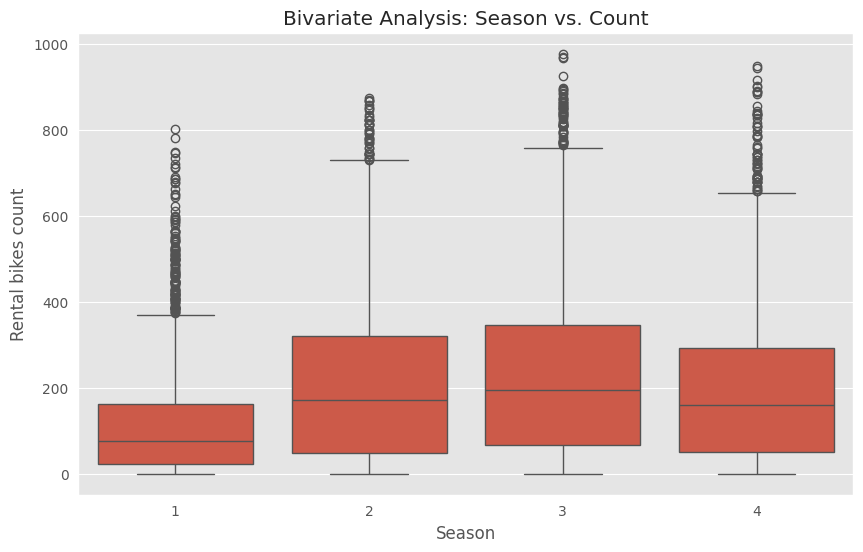

In [ ]:
# Bivariate analysis for season and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=df)
plt.title('Bivariate Analysis: Season vs. Count')
plt.xlabel('Season')
plt.ylabel('Rental bikes count')
plt.show()

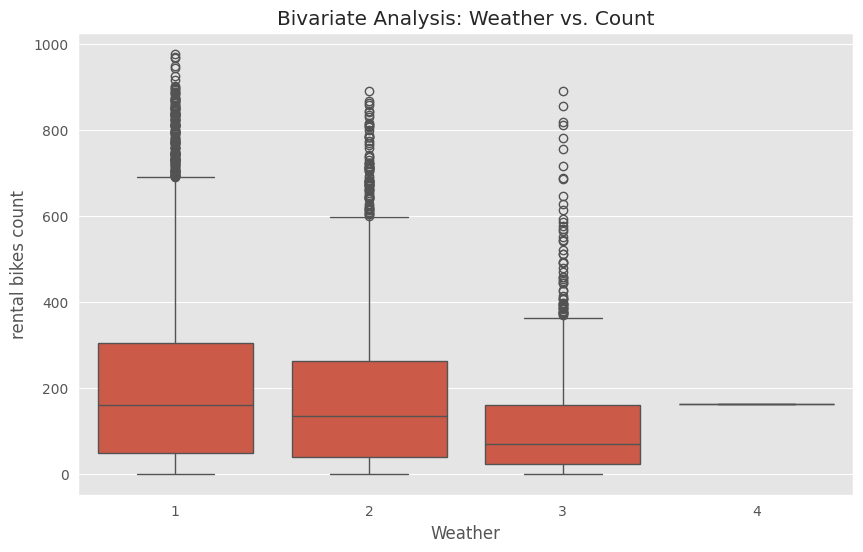

In [ ]:
# Bivariate analysis for weather and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=df)
plt.title('Bivariate Analysis: Weather vs. Count')
plt.xlabel('Weather')
plt.ylabel('rental bikes count')
plt.show()

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


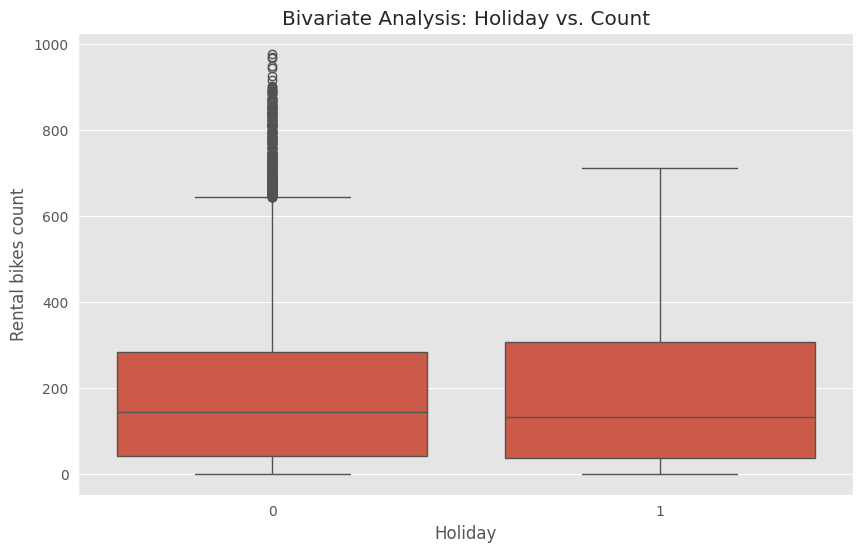

In [ ]:
# Bivariate analysis for Holiday and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='count', data=df)
plt.title('Bivariate Analysis: Holiday vs. Count')
plt.xlabel('Holiday')
plt.ylabel('Rental bikes count')
plt.show()

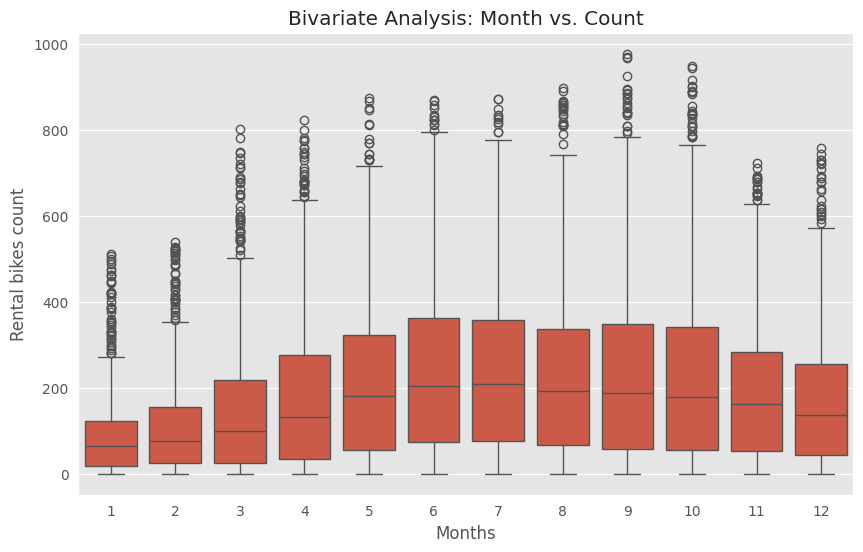

In [ ]:
# Bivariate analysis for Holiday and count
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='count', data=df)
plt.title('Bivariate Analysis: Month vs. Count')
plt.xlabel('Months')
plt.ylabel('Rental bikes count')
plt.show()

<ipython-input-53-ee50fe283e0c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr()


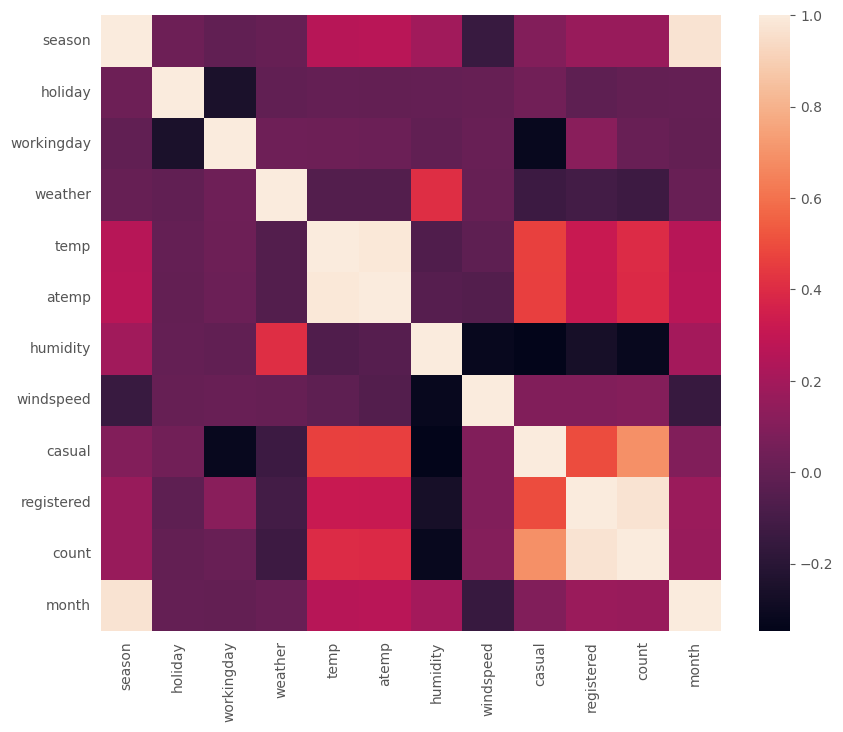

In [ ]:
data = df.corr()
plt.figure(figsize= (10,8))
sns.heatmap(data = data)
plt.show()

IQR = 242.0
Upper = 647.0
Lower = -321.0


<Axes: xlabel='count'>

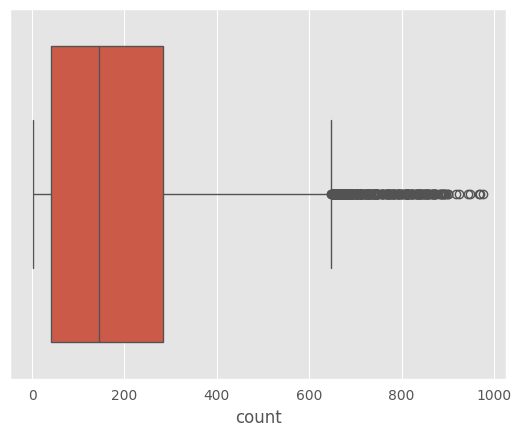

In [ ]:
# Outlier Detection for the Count in the dataset:

Q3 = np.percentile(df['count'],75)
Q1 = np.percentile(df['count'],25)

IQR = Q3 - Q1
print('IQR =',IQR)

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR
print('Upper =',Upper)
print('Lower =',Lower)
sns.boxplot(data = df, x = 'count')

IQR = 2.0
Upper = 7.0
Lower = -1.0


<Axes: xlabel='season'>

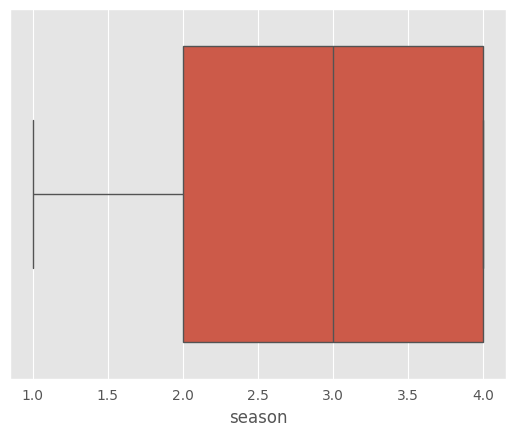

In [ ]:
# Outlier Detection for the Season in the dataset:

Q3 = np.percentile(df['season'],75)
Q1 = np.percentile(df['season'],25)

IQR = Q3 - Q1
print('IQR =',IQR)

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR
print('Upper =',Upper)
print('Lower =',Lower)
sns.boxplot(data = df, x = 'season')

IQR = 1.0
Upper = 3.5
Lower = -0.5


<Axes: xlabel='weather'>

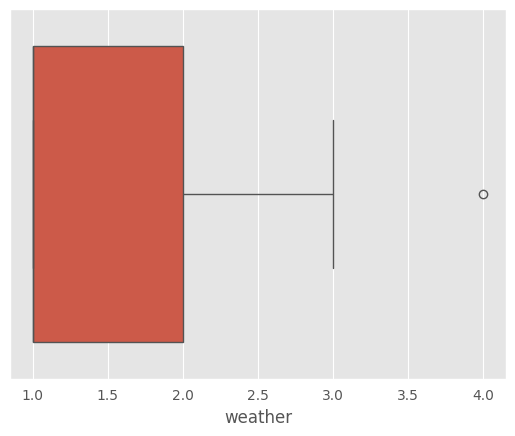

In [ ]:
# Outlier Detection for the weather in the dataset:

Q3 = np.percentile(df['weather'],75)
Q1 = np.percentile(df['weather'],25)

IQR = Q3 - Q1
print('IQR =',IQR)

Upper = Q3 + 1.5*IQR
Lower = Q1 - 1.5*IQR
print('Upper =',Upper)
print('Lower =',Lower)
sns.boxplot(data = df, x = 'weather')

In [ ]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1


 **Hypothesis Testing:**

---


1)  2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented



H0: There is no significant difference in the mean of the number of electric cycles rented between the working and non working day.

Ha: There is significant difference in the mean of the number of electric cycles rented between the working and non working day.

In [ ]:
workingday = df[df['workingday'] == 1]['count']
non_workingday = df[df['workingday'] == 0]['count']

from scipy.stats import ttest_ind

Ttest = ttest_ind(workingday,non_workingday)
print(Ttest)

workingday_mean = df[df['workingday'] == 1]['count'].mean()
non_workingday_mean = df[df['workingday'] == 0]['count'].mean()

print(f'Mean Count on Working Day: {workingday_mean}')
print(f'Mean Count on Non - Working Day: {non_workingday_mean}')

TtestResult(statistic=1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)
Mean Count on Working Day: 193.01187263896384
Mean Count on Non - Working Day: 188.50662061024755


P- value: 0.22
alpha = 0.05

**Since P-value is greater than alpha, failed to reject the Null hypothesis**

Conclusion:
-  There is no significant difference in the mean of the number of electric cycles rented between the working and non working day

2) ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

- **WEATHER:**

H0: There is no significant difference in the means of counts based on weather

Ha: There is significant difference in the means of counts based on weather

In [ ]:
weather_groups = [df['count'][df['weather'] == i] for i in df['weather'].unique()]

from scipy.stats import f_oneway
from scipy.stats import levene
from scipy.stats import shapiro
import scipy.stats as stats

#Variance test:

#H0: Variances are similar
#Ha: Variances are significantly different

variance_Pvalue = levene(*weather_groups)
print(f'variance_Pvalue: {variance_Pvalue}')

#Normality test:

#H0: normality assumption not met
#Ha: normality assumption met

weather_groups_1 = [group for group in weather_groups if len(group) >= 3]
shapiro_weather = [stats.shapiro(group)[1] for group in weather_groups_1]
print(f'Shapiro-Wilk Test Weather - P-Values: {shapiro_weather}')


P_value = f_oneway(*weather_groups)
print(P_value)

variance_Pvalue: LeveneResult(statistic=54.85106195954556, pvalue=3.504937946833238e-35)
Shapiro-Wilk Test Weather - P-Values: [0.0, 9.781063280987223e-43, 3.876090133422781e-33]
F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


P- value: 5.482069475935669e-42, alpha = 0.05

**Since P-value is lesser than alpha, reject the Null hypothesis.**

Conclusion:
- Variances are significantly different
- Normality assumption met
- There is significant difference in the means of counts based on weather

- **SEASON**:

H0: There is no significant difference in the means of counts based on season


Ha: There is significant difference in the means of counts based on season

In [ ]:
season_groups = [df['count'][df['season'] == i] for i in df['season'].unique()]

from scipy.stats import f_oneway
from scipy.stats import levene
from scipy.stats import shapiro
import scipy.stats as stats

#Variance test:

#H0: Variances are similar
#Ha: Variances are significantly different

variance_Pvalue = levene(*season_groups)
print(f'variance_Pvalue: {variance_Pvalue}')

#Normality test:

#H0: normality assumption not met
#Ha: normality assumption met

season_groups_1 = [group for group in season_groups if len(group) >= 3]
shapiro_season = [stats.shapiro(group)[1] for group in season_groups_1]
print(f'Shapiro-Wilk Test Season - P-Values: {shapiro_season}')


P_value = f_oneway(*season_groups)
print(P_value)

variance_Pvalue: LeveneResult(statistic=187.7706624026276, pvalue=1.0147116860043298e-118)
Shapiro-Wilk Test Season - P-Values: [0.0, 6.039093315091269e-39, 1.043458045587339e-36, 1.1301682309549298e-39]
F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)


P- value: 6.164843386499654e-149, alpha = 0.05

**Since P-value is lesser than alpha, reject the Null hypothesis.**

Conclusion:
- Variances are significantly different
- Normality assumption met
- There is significant difference in the means of counts based on season.

3) Chi-square test to check if Weather is dependent on the season

H0: Weather is independent of Season

Ha: Weather is dependent of Season

In [ ]:
contingency_table = pd.crosstab(df['weather'], df['season'])
print(contingency_table)

from scipy.stats import chi2_contingency

Pvalue = chi2_contingency(contingency_table)
print(Pvalue)

season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0
Chi2ContingencyResult(statistic=49.15865559689363, pvalue=1.5499250736864862e-07, dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))


P- value: 1.5499250736864862e-07, alpha = 0.05

Since P-value is lesser than alpha, reject the Null hypothesis.

Conclusion:

- Weather is dependent of Season.

***INSIGHTS:***

---

**Datetime:** Helped to Check for any trends or seasonality over time. Looked for patterns in bike rental counts based on days, months, or years.

**Season:** Observed the distribution of rentals across different seasons.All 4 seasons shows the similar results.

**Holiday:** Helped to Understand how holidays impact bike rentals.

**Workingday:** Explored the difference in rentals on working days versus non-working days. Yulu has good business opportunities during the working days.

**Weather:** Analyzed the distribution of rentals under different weather conditions. And understood that weather 1(Clear, Few clouds, partly cloudy, partly cloudy) showed good results when compared to others and weather 4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog). it has zero impacts on business

**Temp, atemp, Humidity, Windspeed:** Examined the distribution of temperature, humidity, and windspeed to identify any outliers.

**Casual, Registered, Count:** Investigated the distribution of casual and registered user rentals. Explored the overall count distribution and identify any extreme values (outliers)


**Season vs. Count:** Examined how bike rentals vary across different seasons. All 4 seasons showed the good results. Concentrating more on season 3(Fall) would help to increase the business opportunities more since the count was high.

**Workingday vs. Count:** Explored both the counts and found working days shows the increase in busniess when compared to the non working days.

**Weather vs. Count:** Investigated the impact of weather conditions on bike rentals. Out of 4, weather 1 (Clear, Few clouds, partly cloudy, partly cloudy) had the highest count value. it showed the clear weather is important to run the business.

**Temperature vs. Count:** Understood the relationship between temperature and bike rentals. It doesn't have direct impacts.

**Humidity vs. Count:** Explored the influence of humidity on bike rentals. increased in the humidity frequency count increased the business opportunities.

**Windspeed vs. Count:** understood the effect of windspeed on bike rentals. increased the windspeed gradually decreased the business.

***Conclusion:***

---



- EDA provided a comprehensive understanding of the dataset, enabled better-informed decisions for subsequent analysis and modeling.

- Identified patterns, relationships, and potential areas for feature engineering or outlier treatment.

- These insights guide further steps in data preprocessing and modeling for accurate predictions.